In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [2]:
data = pd.read_csv('MagicBricks.csv')

In [3]:
data.shape

(1259, 11)

## Preprocessing of Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [5]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [6]:
data.isna().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [7]:
data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [8]:
data.drop(columns=['Parking','Status'] , inplace=True)

In [9]:
data['Bathroom'].mode()

0    2.0
Name: Bathroom, dtype: float64

In [10]:
data['Bathroom'].fillna(2 , inplace=True)

C:\Users\Vishal\AppData\Local\Temp\ipykernel_11232\853398828.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bathroom'].fillna(2 , inplace=True)


In [11]:
data['Furnishing'].value_counts()

Furnishing
Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: count, dtype: int64

In [12]:
data['Furnishing'].fillna('Semi-Furnished' , inplace=True)

C:\Users\Vishal\AppData\Local\Temp\ipykernel_11232\2926935239.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Furnishing'].fillna('Semi-Furnished' , inplace=True)


In [13]:
data['Type'].mode()

0    Builder_Floor
Name: Type, dtype: object

In [14]:
data['Type'].fillna('Builder_Floor' , inplace=True)

C:\Users\Vishal\AppData\Local\Temp\ipykernel_11232\1102341178.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Type'].fillna('Builder_Floor' , inplace=True)


In [15]:
data['Per_Sqft'].fillna(data['Per_Sqft'].median() , inplace=True)

C:\Users\Vishal\AppData\Local\Temp\ipykernel_11232\725466143.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Per_Sqft'].fillna(data['Per_Sqft'].median() , inplace=True)


In [16]:
data.isna().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Price          0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [17]:
for locality in data['Locality']:
    if len(locality.split(' ')) > 10:
        print(locality)
        print('\n')


Rohini Sector 24 carpet area 650 sqft status Ready to Move floor 4 out of 4 floors transaction New Property furnishing Semi-Furnished facing East overlooking Garden/Park, Main Road car parking 1 Open bathroom 2 balcony 1 ownership Freehold Newly Constructed Property Newly Constructed Property East Facing Property 2BHK Newly build property for Sale. A House is waiting for a Friendly Family to make it a lovely home.So please come and make his house feel alive once again. read more Contact Agent View Phone No. Share Feedback Garima properties Certified Agent Trusted by Users Genuine Listings Market Knowledge


Rohini Sector 8 How Auctions work? The borrower has the physical possession of the Property. However the lender (Bank) can legally sell the Property. super area 32 sqm status Ready to Move floor 1 transaction Resale furnishing Semi-Furnished Contact Now Enquire Now Auction By


Rohini Sector 25 carpet area 660 sqft status Ready to Move floor 2 out of 4 floors transaction New Propert

In [18]:
# function for retrieving the 'Locality' from given information about 'locality'
def retrive_left_part(sentence , repeating_strings):
    for s in repeating_strings:
        if s in sentence:
            return sentence.split(s)[0]
        else:
            return sentence

In [19]:
repeating_strings = ["carpet area" , "super area" , "How Auctions work?"]
data['Locality'] = data['Locality'].apply(lambda sentence: retrive_left_part(sentence , repeating_strings))

In [20]:
data['Locality'] = data['Locality'].apply(lambda x : x.strip())
locality_counts = data['Locality'].value_counts()
locality_counts

Locality
Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 34
Lajpat Nagar 2                                                                                                                                                               

In [21]:
less_than_8 = locality_counts[locality_counts<8]
less_than_8.shape

(290,)

In [22]:
# marking those localities as 'Others' which have a frequency less than 8
data['Locality'] = data['Locality'].apply(lambda x: 'Other' if x in less_than_8 else x)

In [23]:
data['Locality'].value_counts()

Locality
Other                                                           568
Lajpat Nagar 3                                                   34
Lajpat Nagar 2                                                   33
J R Designers Floors, Rohini Sector 24                           31
Kailash Colony, Greater Kailash                                  30
Yamuna Vihar, Shahdara                                           29
Mehrauli                                                         26
Laxmi Nagar                                                      26
Chittaranjan Park                                                26
Safdarjung Enclave                                               22
Saket                                                            21
Alaknanda                                                        20
DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road               19
Chhattarpur                                                      18
The Amaryllis, Karol Bagh              

In [24]:
(data['Area']/data['BHK']).describe()

count    1259.000000
mean      501.167417
std       416.755438
min        11.250000
25%       350.000000
50%       450.000000
75%       551.250000
max      6075.000000
dtype: float64

In [25]:
data = data[((data['Area']/data['BHK'])>=250)]

## Outlier detection and removal

In [26]:
data.describe()

,Area,BHK,Bathroom,Price,Per_Sqft
count,1170.000000,1170.000000,1170.000000,1.170000e+03,1170.000000
mean,1547.146705,2.806838,2.605983,2.239960e+07,14591.292308
std,1596.508581,0.923204,1.030484,2.616146e+07,18605.234164
min,270.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,900.000000,2.000000,2.000000,6.225000e+06,6894.500000
50%,1270.000000,3.000000,2.000000,1.500000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.637500e+07,15459.000000
max,24300.000000,7.000000,7.000000,2.400000e+08,183333.000000


In [27]:
# making subplots for each numeric feature

C:\Users\Vishal\AppData\Local\Temp\ipykernel_11232\2634206781.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Area'])
C:\Users\Vishal\AppData\Local\Temp\ipykernel_11232\2634206781.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BHK'])
C:\Users\Vishal\AppData\Local\Temp\ipyker

<Axes: xlabel='Per_Sqft', ylabel='Density'>

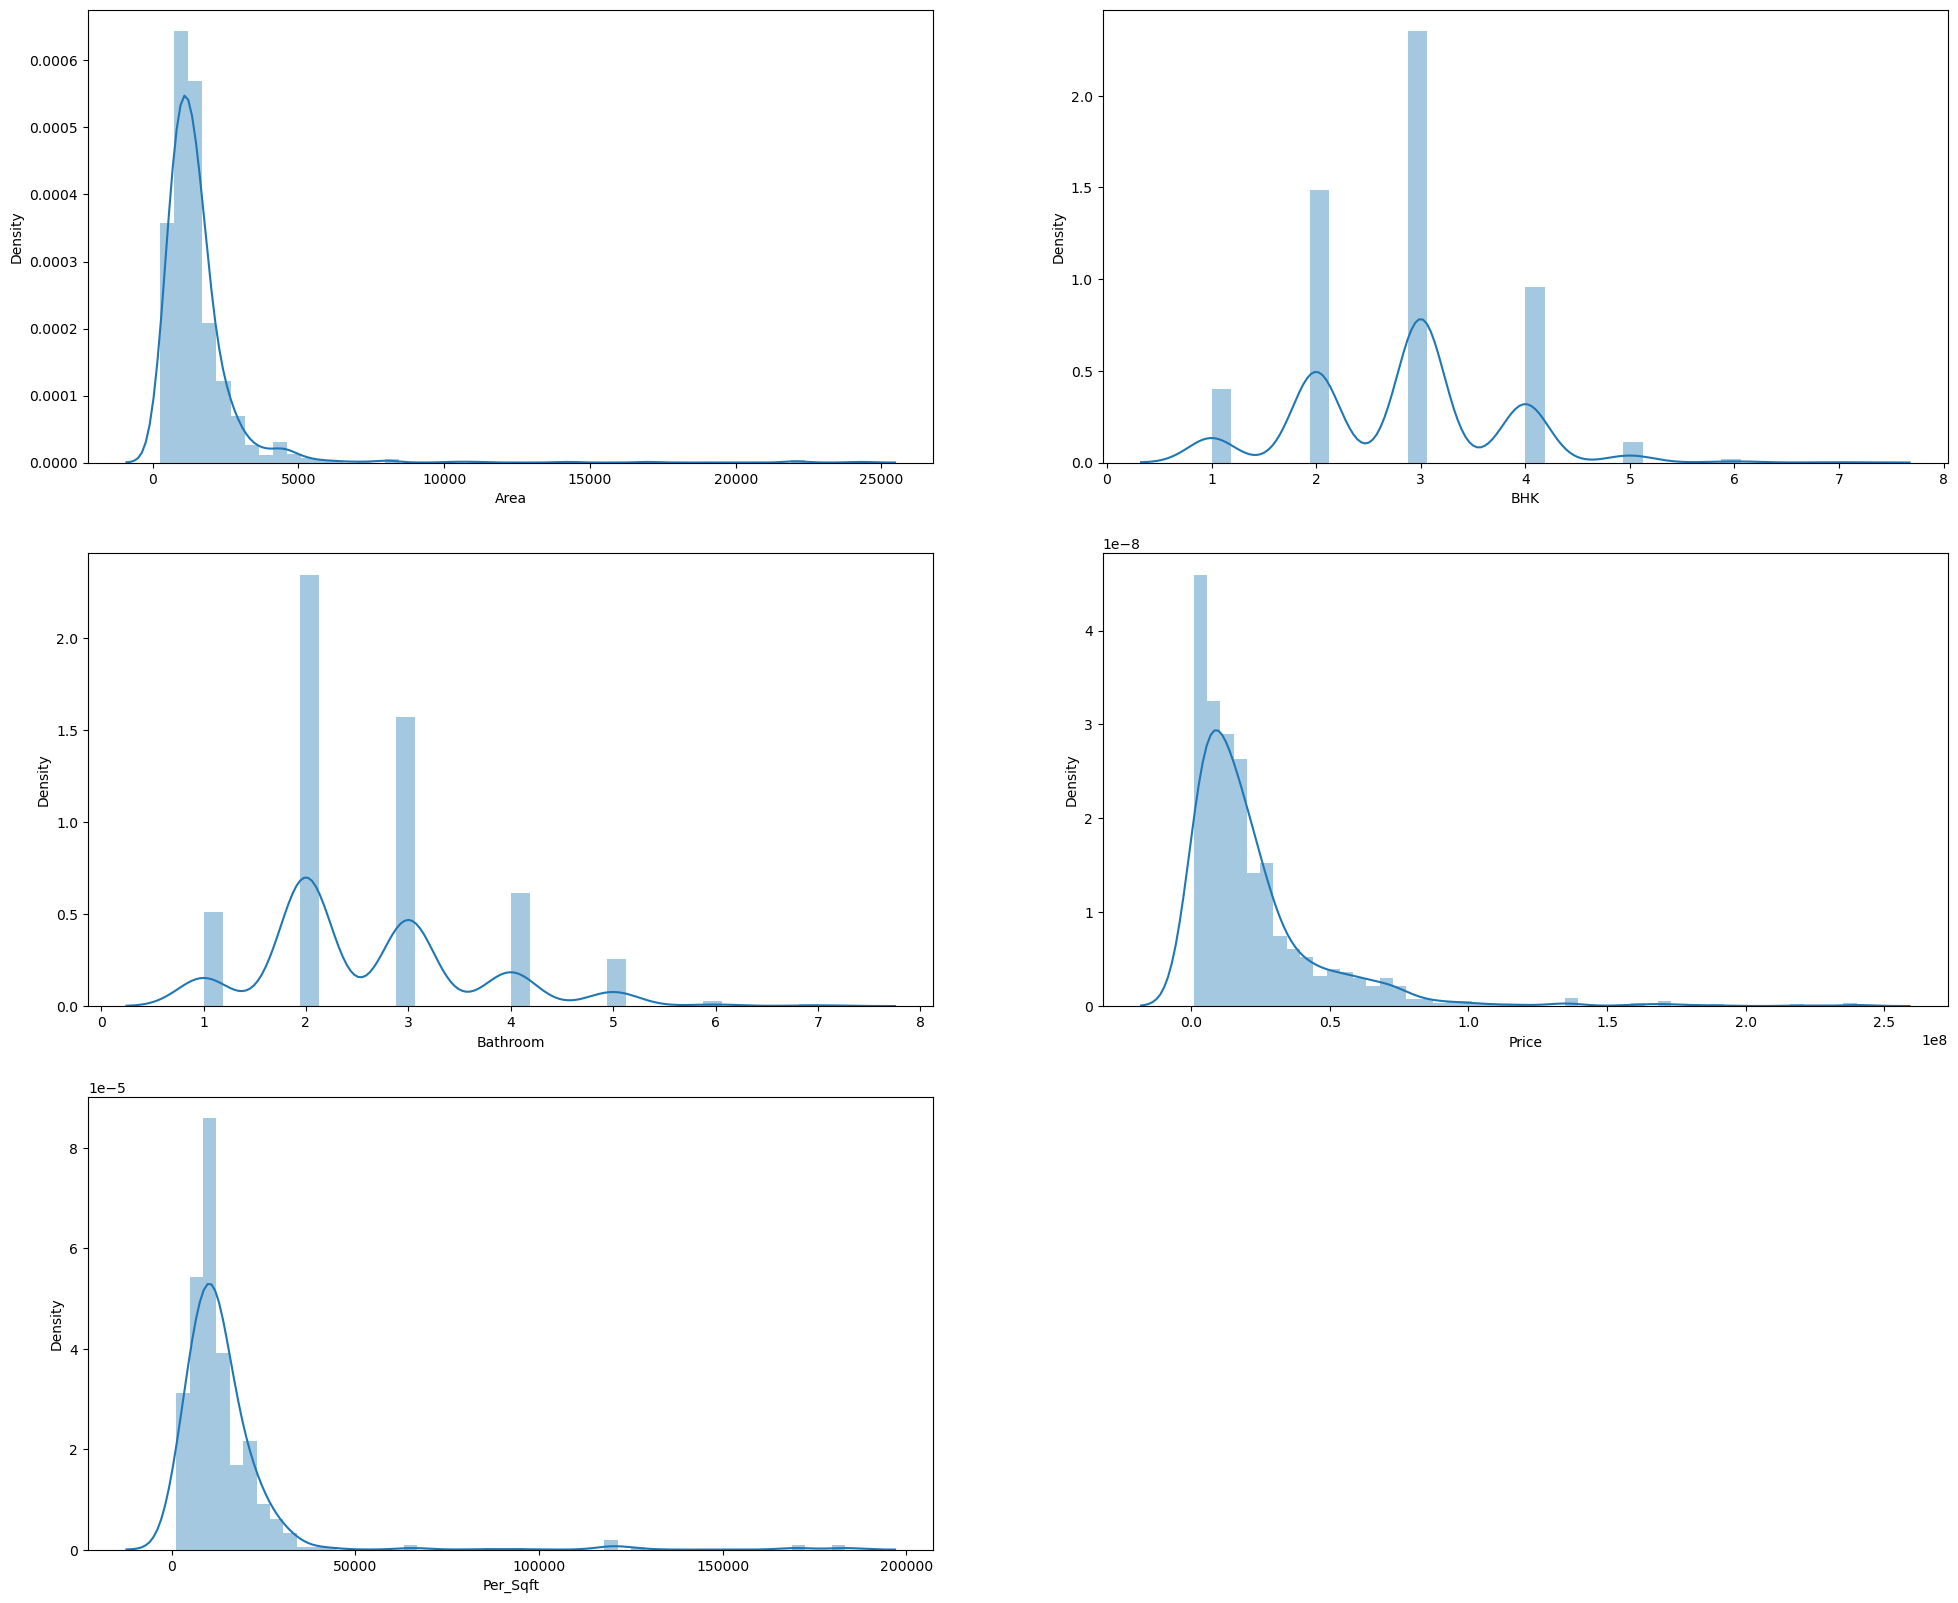

In [28]:
plt.figure(figsize=(24,20))
plt.subplot(3,2,1)
sns.distplot(data['Area'])

plt.subplot(3,2,2)
sns.distplot(data['BHK'])

plt.subplot(3,2,3)
sns.distplot(data['Bathroom'])

plt.subplot(3,2,4)
sns.distplot(data['Price'])

plt.subplot(3,2,5)
sns.distplot(data['Per_Sqft'])

In [29]:
print("Skew value of : ")
print("Area :",data['Area'].skew())
print("BHK :", data['BHK'].skew())
print("Bathroom :", data['Bathroom'].skew())
print("Price :", data['Price'].skew())
print("Per_Sqft :", data['Per_Sqft'].skew())

Skew value of : 
Area : 8.108675023346459
BHK : 0.1500687509847244
Bathroom : 0.8346969546414659
Price : 3.421617136902089
Per_Sqft : 6.357135178358745


In [30]:
# All the numeric features are right skewed

<Axes: title={'center': 'Per_Sqft'}, xlabel='Per_Sqft'>

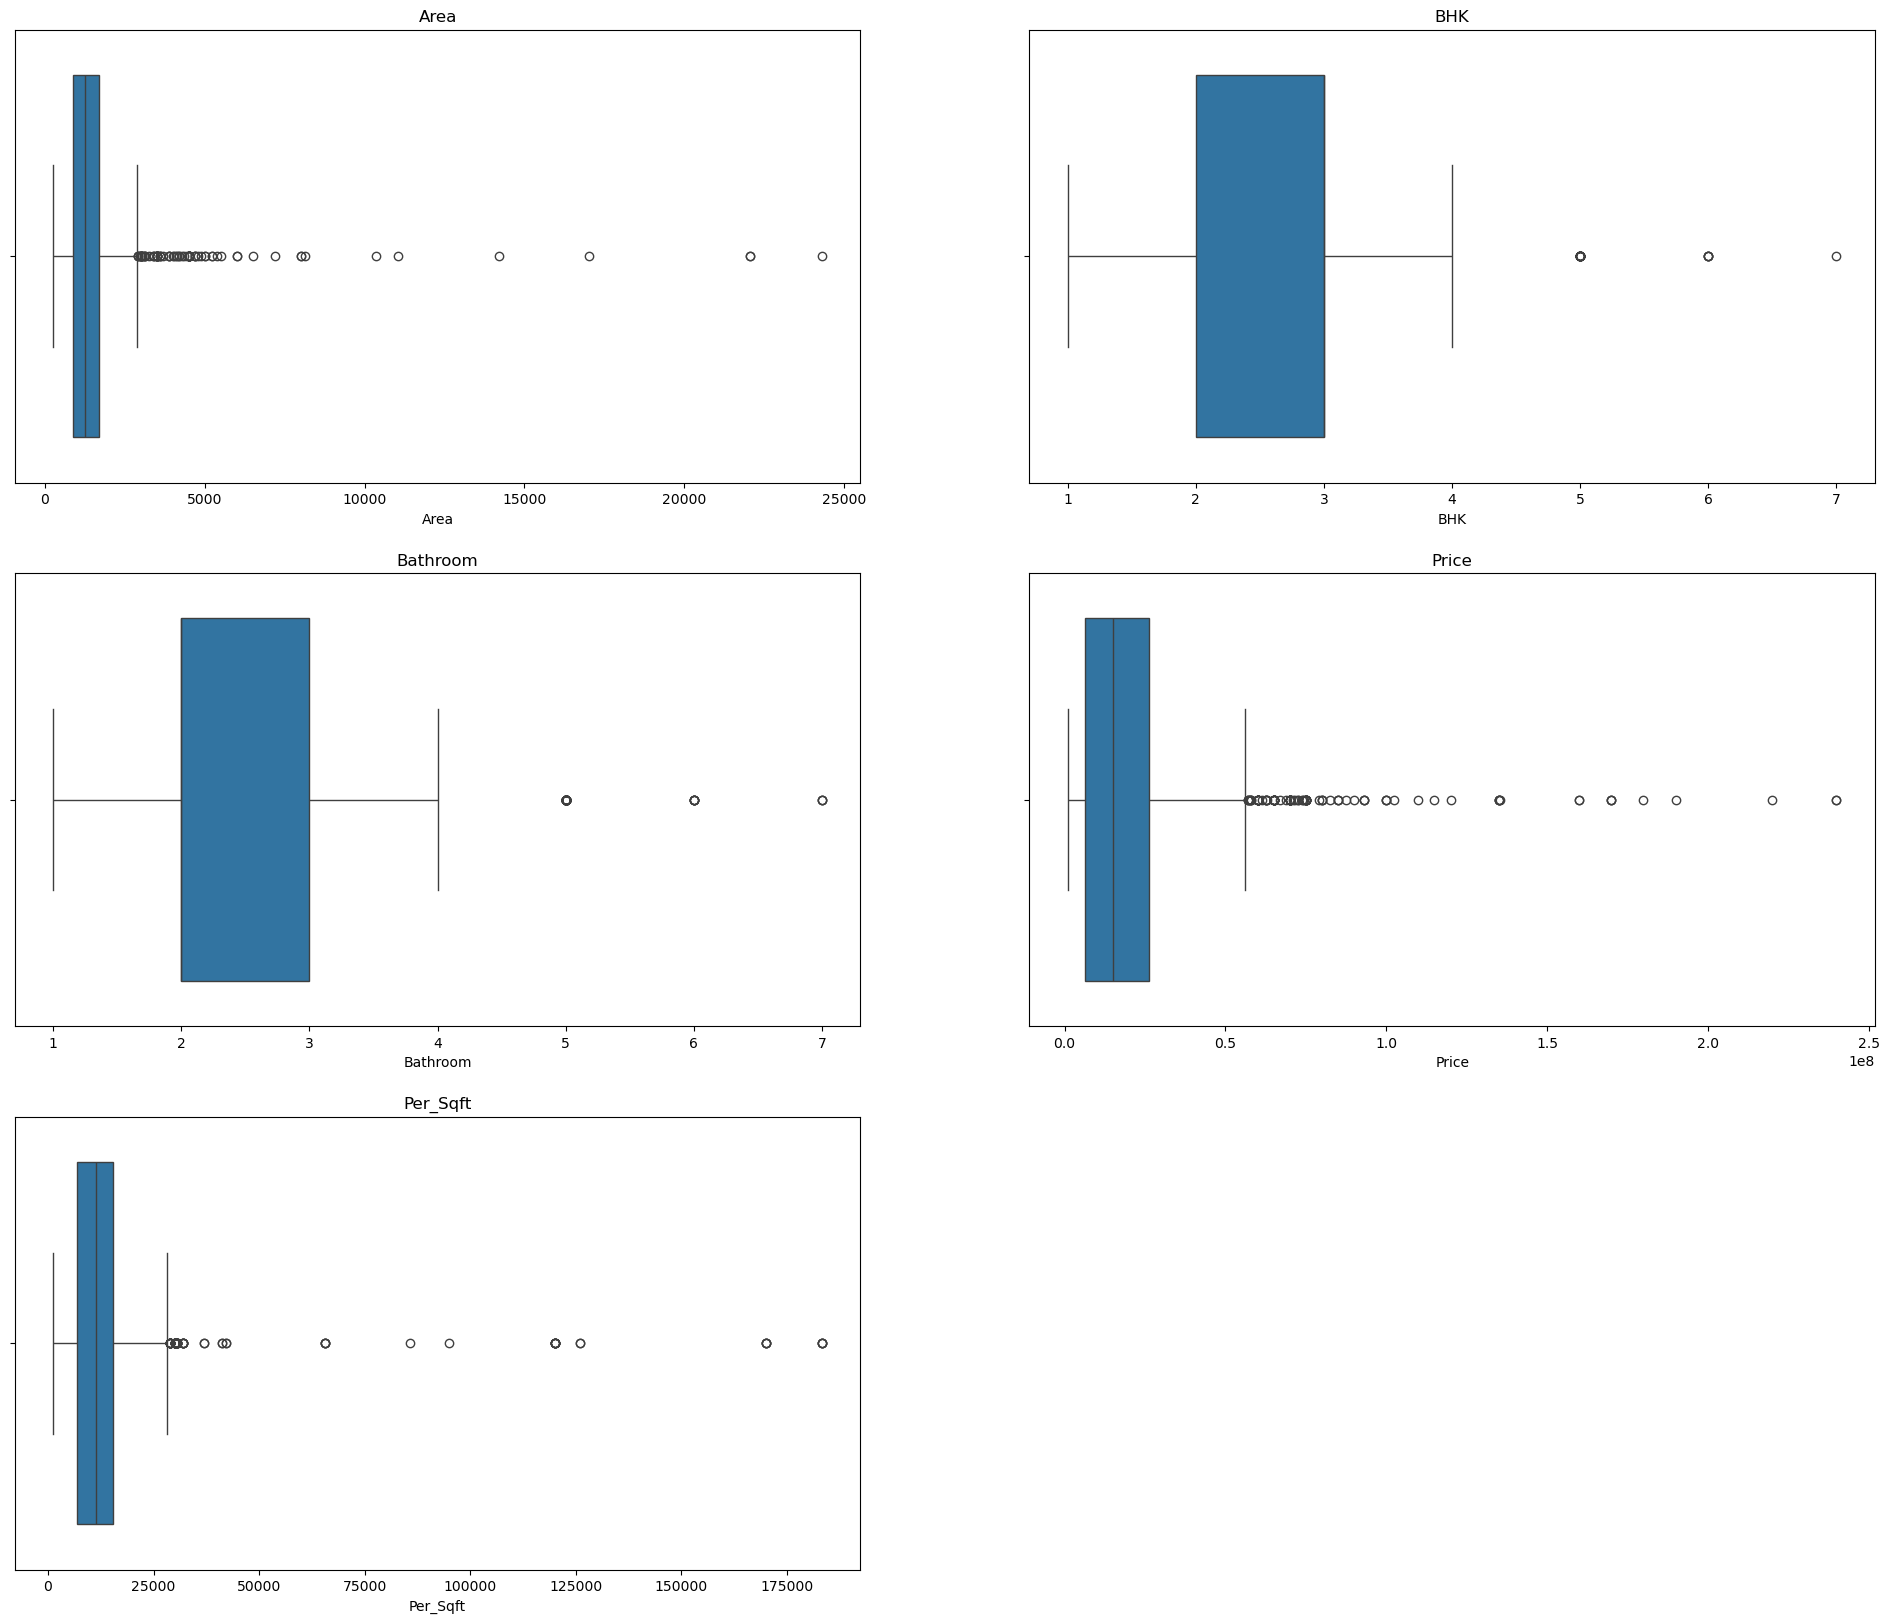

In [31]:
# Box plots for each feature
plt.figure(figsize=(24,20))
plt.subplot(3,2,1)
plt.title('Area')
sns.boxplot(data['Area'],orient='h')

plt.subplot(3,2,2)
plt.title('BHK')
sns.boxplot(data['BHK'],orient='h')

plt.subplot(3,2,3)
plt.title('Bathroom')
sns.boxplot(data['Bathroom'],orient='h')

plt.subplot(3,2,4)
plt.title('Price')
sns.boxplot(data['Price'],orient='h')

plt.subplot(3,2,5)
plt.title('Per_Sqft')
sns.boxplot(data['Per_Sqft'],orient='h')

### Removig outliers in 'Area'

In [32]:
area_q1 = data['Area'].quantile(0.25)
area_q3 = data['Area'].quantile(0.75)
area_iqr = area_q3 - area_q1
area_iqr

800.0

In [33]:
area_upper_limit = area_q3 + 1.5*area_iqr
area_lower_limit = area_q1 - 1.5*area_iqr
print(area_lower_limit , area_upper_limit)

-300.0 2900.0


In [34]:
data[data['Area'] > area_upper_limit] 

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction,Type,Per_Sqft
50,2925.0,4,4.0,Unfurnished,Lajpat Nagar 3,57500000,New_Property,Builder_Floor,22000.0
57,8000.0,4,5.0,Semi-Furnished,Other,240000000,New_Property,Builder_Floor,22000.0
94,2925.0,4,4.0,Unfurnished,Lajpat Nagar 3,57500000,New_Property,Builder_Floor,11291.5
109,8000.0,4,5.0,Semi-Furnished,Other,240000000,New_Property,Builder_Floor,20000.0
163,4050.0,6,3.0,Furnished,Other,5100000,Resale,Builder_Floor,1259.0
...,...,...,...,...,...,...,...,...,...
1211,4350.0,4,6.0,Semi-Furnished,Other,135000000,New_Property,Apartment,170000.0
1213,3600.0,4,4.0,Semi-Furnished,Other,65000000,New_Property,Builder_Floor,18055.0
1224,5400.0,4,4.0,Unfurnished,"Hauz Khas Enclave, Hauz Khas",110000000,Resale,Builder_Floor,17677.0
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,55000000,New_Property,Builder_Floor,12916.0


In [35]:
# Trimming on 'Area'
new_data = data[data['Area'] <= area_upper_limit] 

C:\Users\Vishal\AppData\Local\Temp\ipykernel_11232\2669528804.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Area'])
C:\Users\Vishal\AppData\Local\Temp\ipykernel_11232\2669528804.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Area'])


<Axes: xlabel='Area', ylabel='Density'>

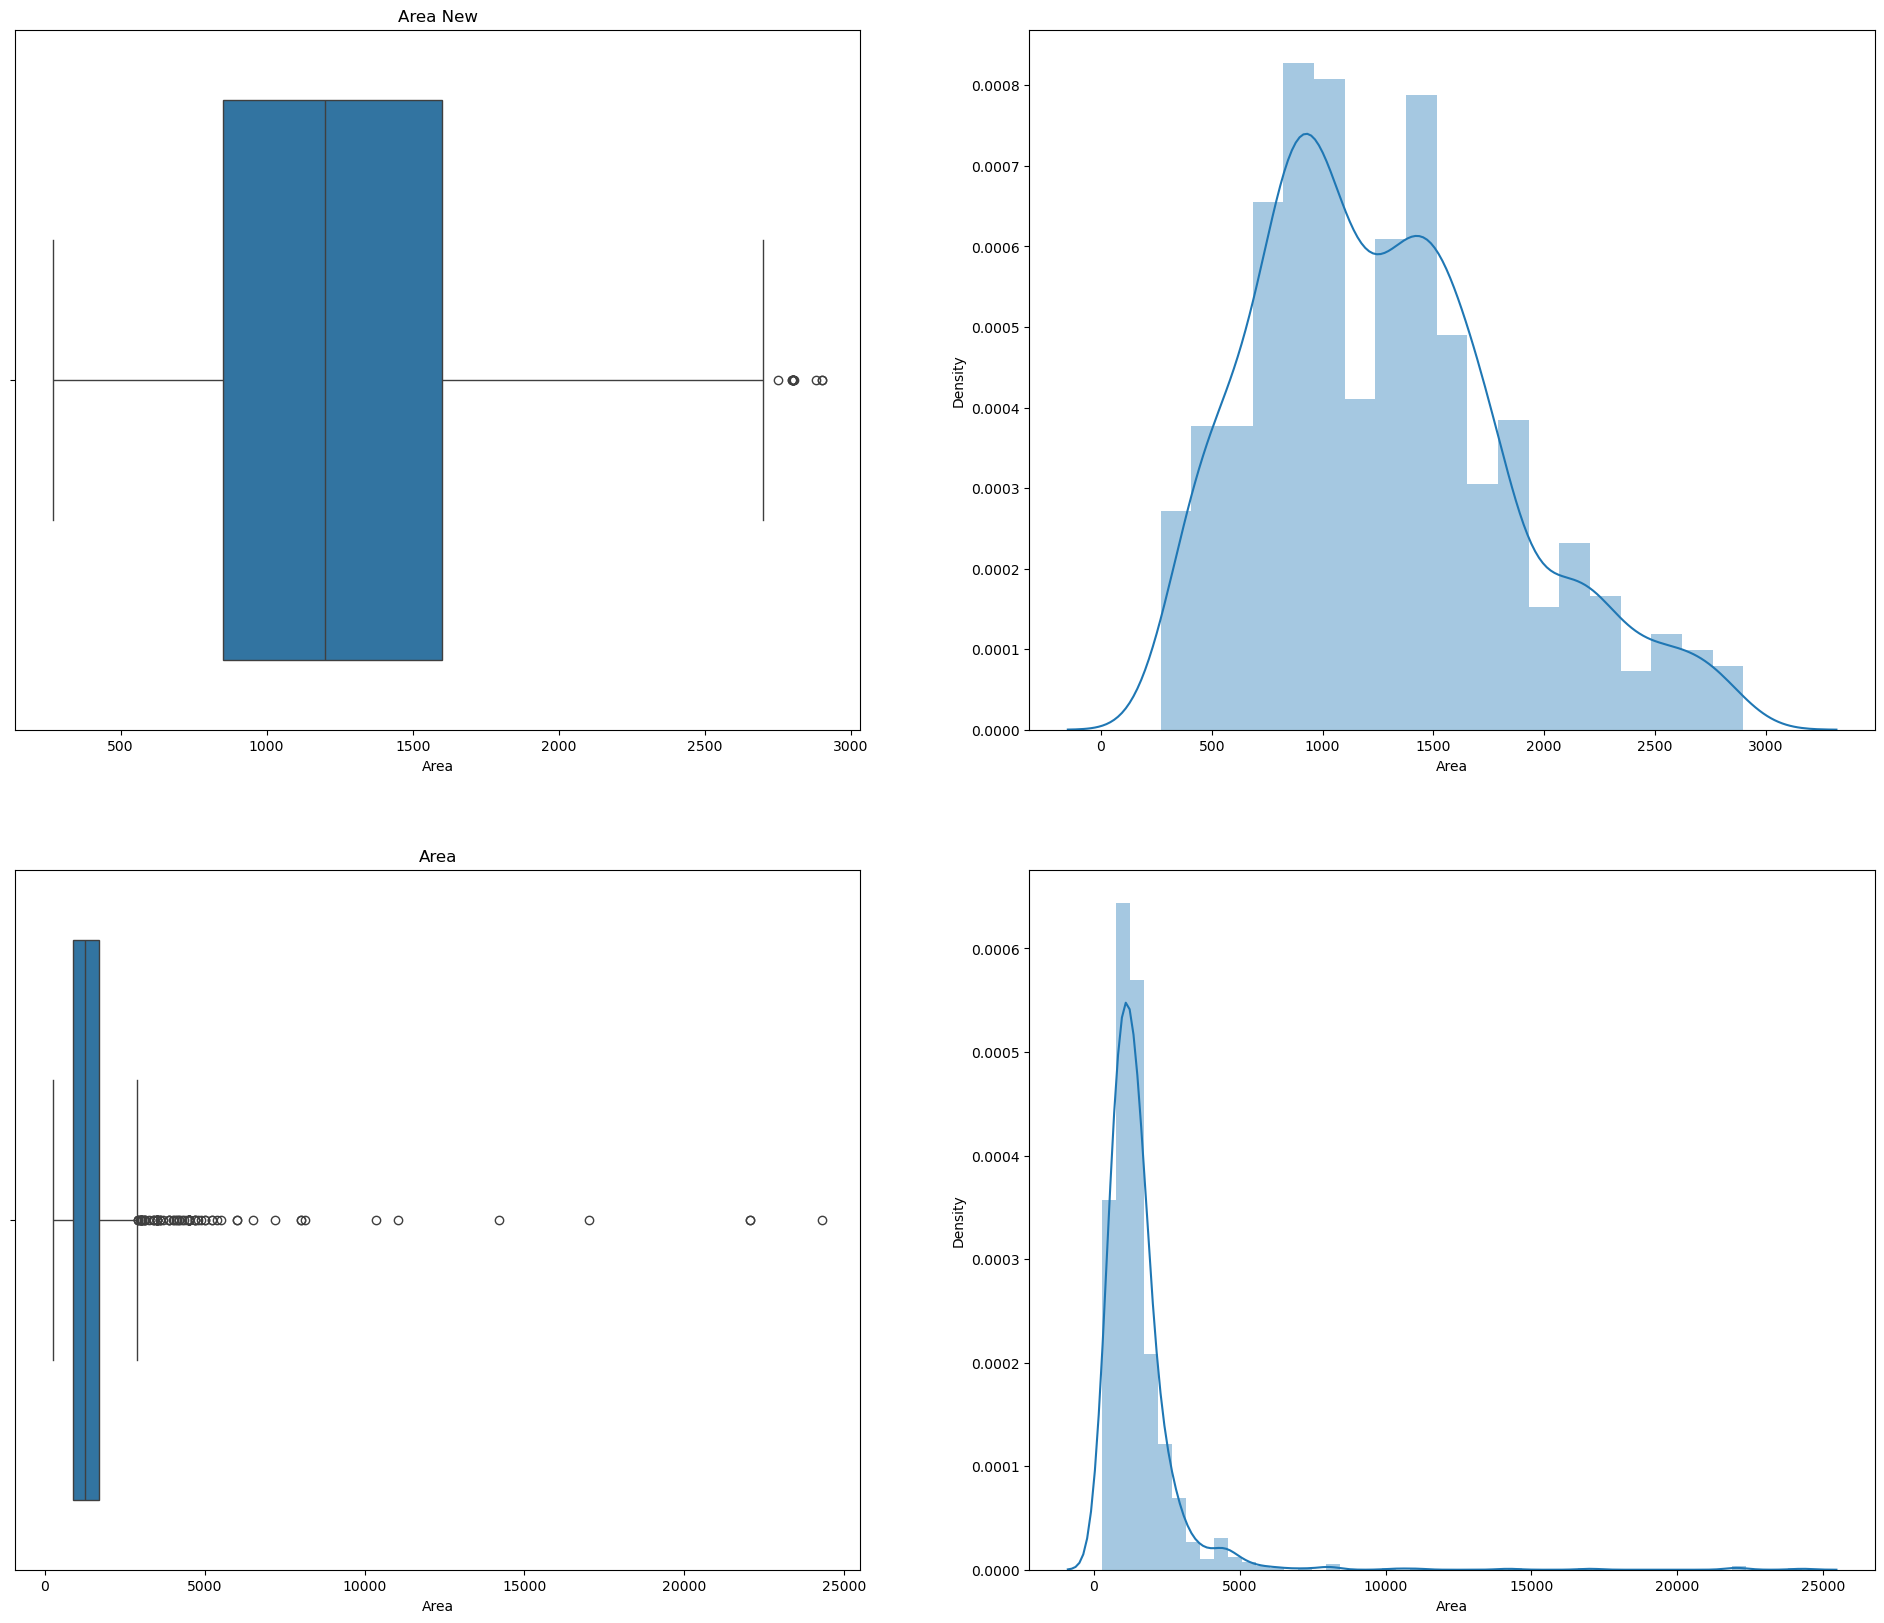

In [36]:
# Comparing 
plt.figure(figsize=(24,20))
plt.subplot(2,2,1)
plt.title('Area New')
sns.boxplot(new_data['Area'],orient='h')

plt.subplot(2,2,2)
sns.distplot(new_data['Area'])

plt.subplot(2,2,3)
plt.title('Area')
sns.boxplot(data['Area'],orient='h')

plt.subplot(2,2,4)
sns.distplot(data['Area'])

### Removig outliers in 'BHK'

In [37]:
BHK_q1 = new_data['BHK'].quantile(0.25)
BHK_q3 = new_data['BHK'].quantile(0.75)
BHK_iqr = BHK_q3 - BHK_q1
BHK_iqr

1.0

In [38]:
BHK_upper_limit = BHK_q3 + 1.5*BHK_iqr
BHK_lower_limit = BHK_q1 - 1.5*BHK_iqr
print(BHK_lower_limit , BHK_upper_limit)

0.5 4.5


In [39]:
new_data[new_data['BHK'] > BHK_upper_limit]

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction,Type,Per_Sqft
164,2400.0,6,4.0,Furnished,Other,6000000,Resale,Builder_Floor,2500.0
196,2800.0,5,4.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",17500000,New_Property,Apartment,6250.0
224,2900.0,5,5.0,Furnished,Other,51000000,New_Property,Builder_Floor,22222.0
261,2800.0,6,4.0,Semi-Furnished,Other,29500000,Resale,Apartment,15459.0
347,1500.0,5,3.0,Furnished,"Yamuna Vihar, Shahdara",30000000,Resale,Builder_Floor,20000.0
494,2900.0,5,5.0,Furnished,Other,51000000,New_Property,Builder_Floor,22222.0
519,1530.0,5,2.0,Furnished,Other,10200000,Resale,Builder_Floor,6667.0
681,2300.0,5,6.0,Semi-Furnished,"Common Wealth Games Village, Commonwealth Game...",58000000,Resale,Apartment,21311.0


In [40]:
# Trimming on 'BHK'
new_data[new_data['BHK'] < BHK_lower_limit]

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction,Type,Per_Sqft


In [41]:
new_data = new_data[new_data['BHK'] <= BHK_upper_limit] 

C:\Users\Vishal\AppData\Local\Temp\ipykernel_11232\754312383.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['BHK'])
C:\Users\Vishal\AppData\Local\Temp\ipykernel_11232\754312383.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BHK'])


<Axes: xlabel='BHK', ylabel='Density'>

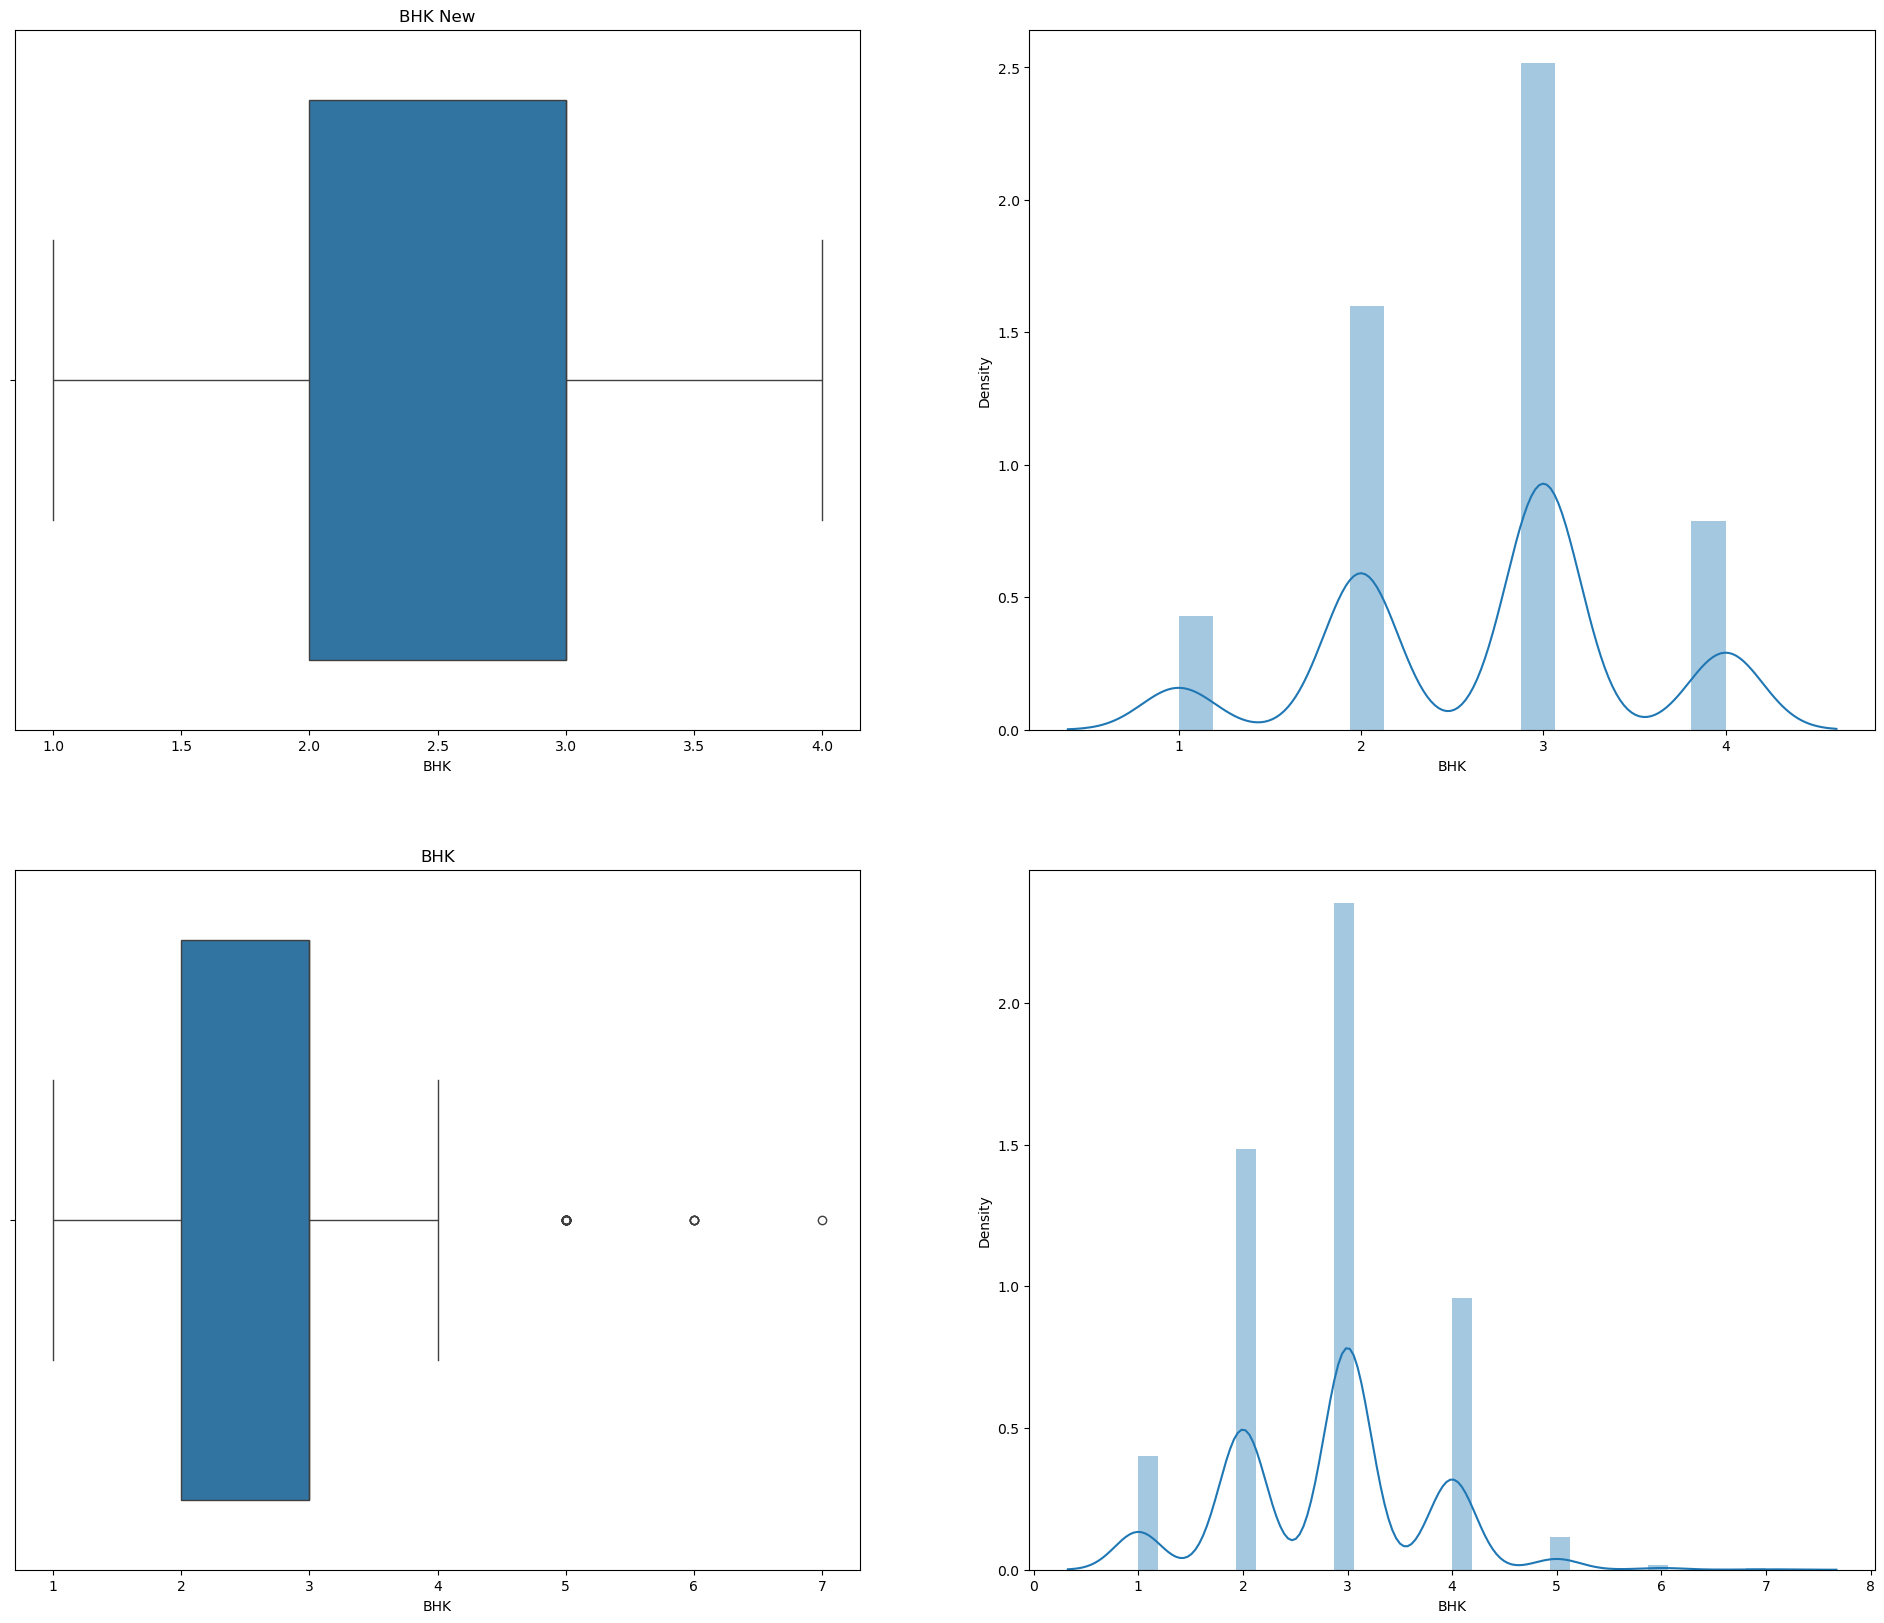

In [42]:
# Comparing 
plt.figure(figsize=(24,20))
plt.subplot(2,2,1)
plt.title('BHK New')
sns.boxplot(new_data['BHK'],orient='h')

plt.subplot(2,2,2)
sns.distplot(new_data['BHK'])

plt.subplot(2,2,3)
plt.title('BHK')
sns.boxplot(data['BHK'],orient='h')

plt.subplot(2,2,4)
sns.distplot(data['BHK'])

### Removing outliers in 'Price'

In [43]:
price_q1 = new_data['Price'].quantile(0.25)
price_q3 = new_data['Price'].quantile(0.75)
price_iqr = price_q3 - price_q1
price_iqr

18500000.0

In [44]:
price_upper_limit = price_q3 + 1.5*price_iqr
price_lower_limit = price_q1 - 1.5*price_iqr
print(price_lower_limit , price_upper_limit)

-21750000.0 52250000.0


In [45]:
new_data[new_data['Price'] > price_upper_limit]

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction,Type,Per_Sqft
104,2700.0000,4,4.0,Semi-Furnished,Lajpat Nagar 3,55000000,Resale,Builder_Floor,183333.0
215,2400.0000,4,4.0,Semi-Furnished,Other,70000000,New_Property,Apartment,2235.0
222,2700.0000,4,3.0,Semi-Furnished,Other,60000000,New_Property,Builder_Floor,22222.0
228,2306.0000,3,3.0,Unfurnished,"The Leela Sky Villas, Patel Nagar",57000000,New_Property,Apartment,24718.0
232,1800.0000,4,3.0,Semi-Furnished,Other,55000000,Resale,Builder_Floor,30556.0
241,1800.0000,4,4.0,Semi-Furnished,New Friends Colony,65000000,New_Property,Builder_Floor,120000.0
247,2450.0000,4,4.0,Furnished,Other,70000000,New_Property,Builder_Floor,120000.0
252,2100.0000,4,5.0,Semi-Furnished,New Friends Colony,56000000,New_Property,Builder_Floor,15459.0
254,1500.0000,3,3.0,Semi-Furnished,New Friends Colony,60000000,New_Property,Builder_Floor,15459.0
260,2000.0000,4,4.0,Semi-Furnished,New Friends Colony,70000000,New_Property,Builder_Floor,15459.0


In [46]:
# Capping on 'Price'
def price_cap(price , price_upper_limit):
    if(price > price_upper_limit):
        return price_upper_limit
    else:
        return price

In [47]:
new_data['Price'] = new_data['Price'].apply(lambda price: price_cap(price,price_upper_limit))

C:\Users\Vishal\AppData\Local\Temp\ipykernel_11232\2391864898.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Price'])
C:\Users\Vishal\AppData\Local\Temp\ipykernel_11232\2391864898.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

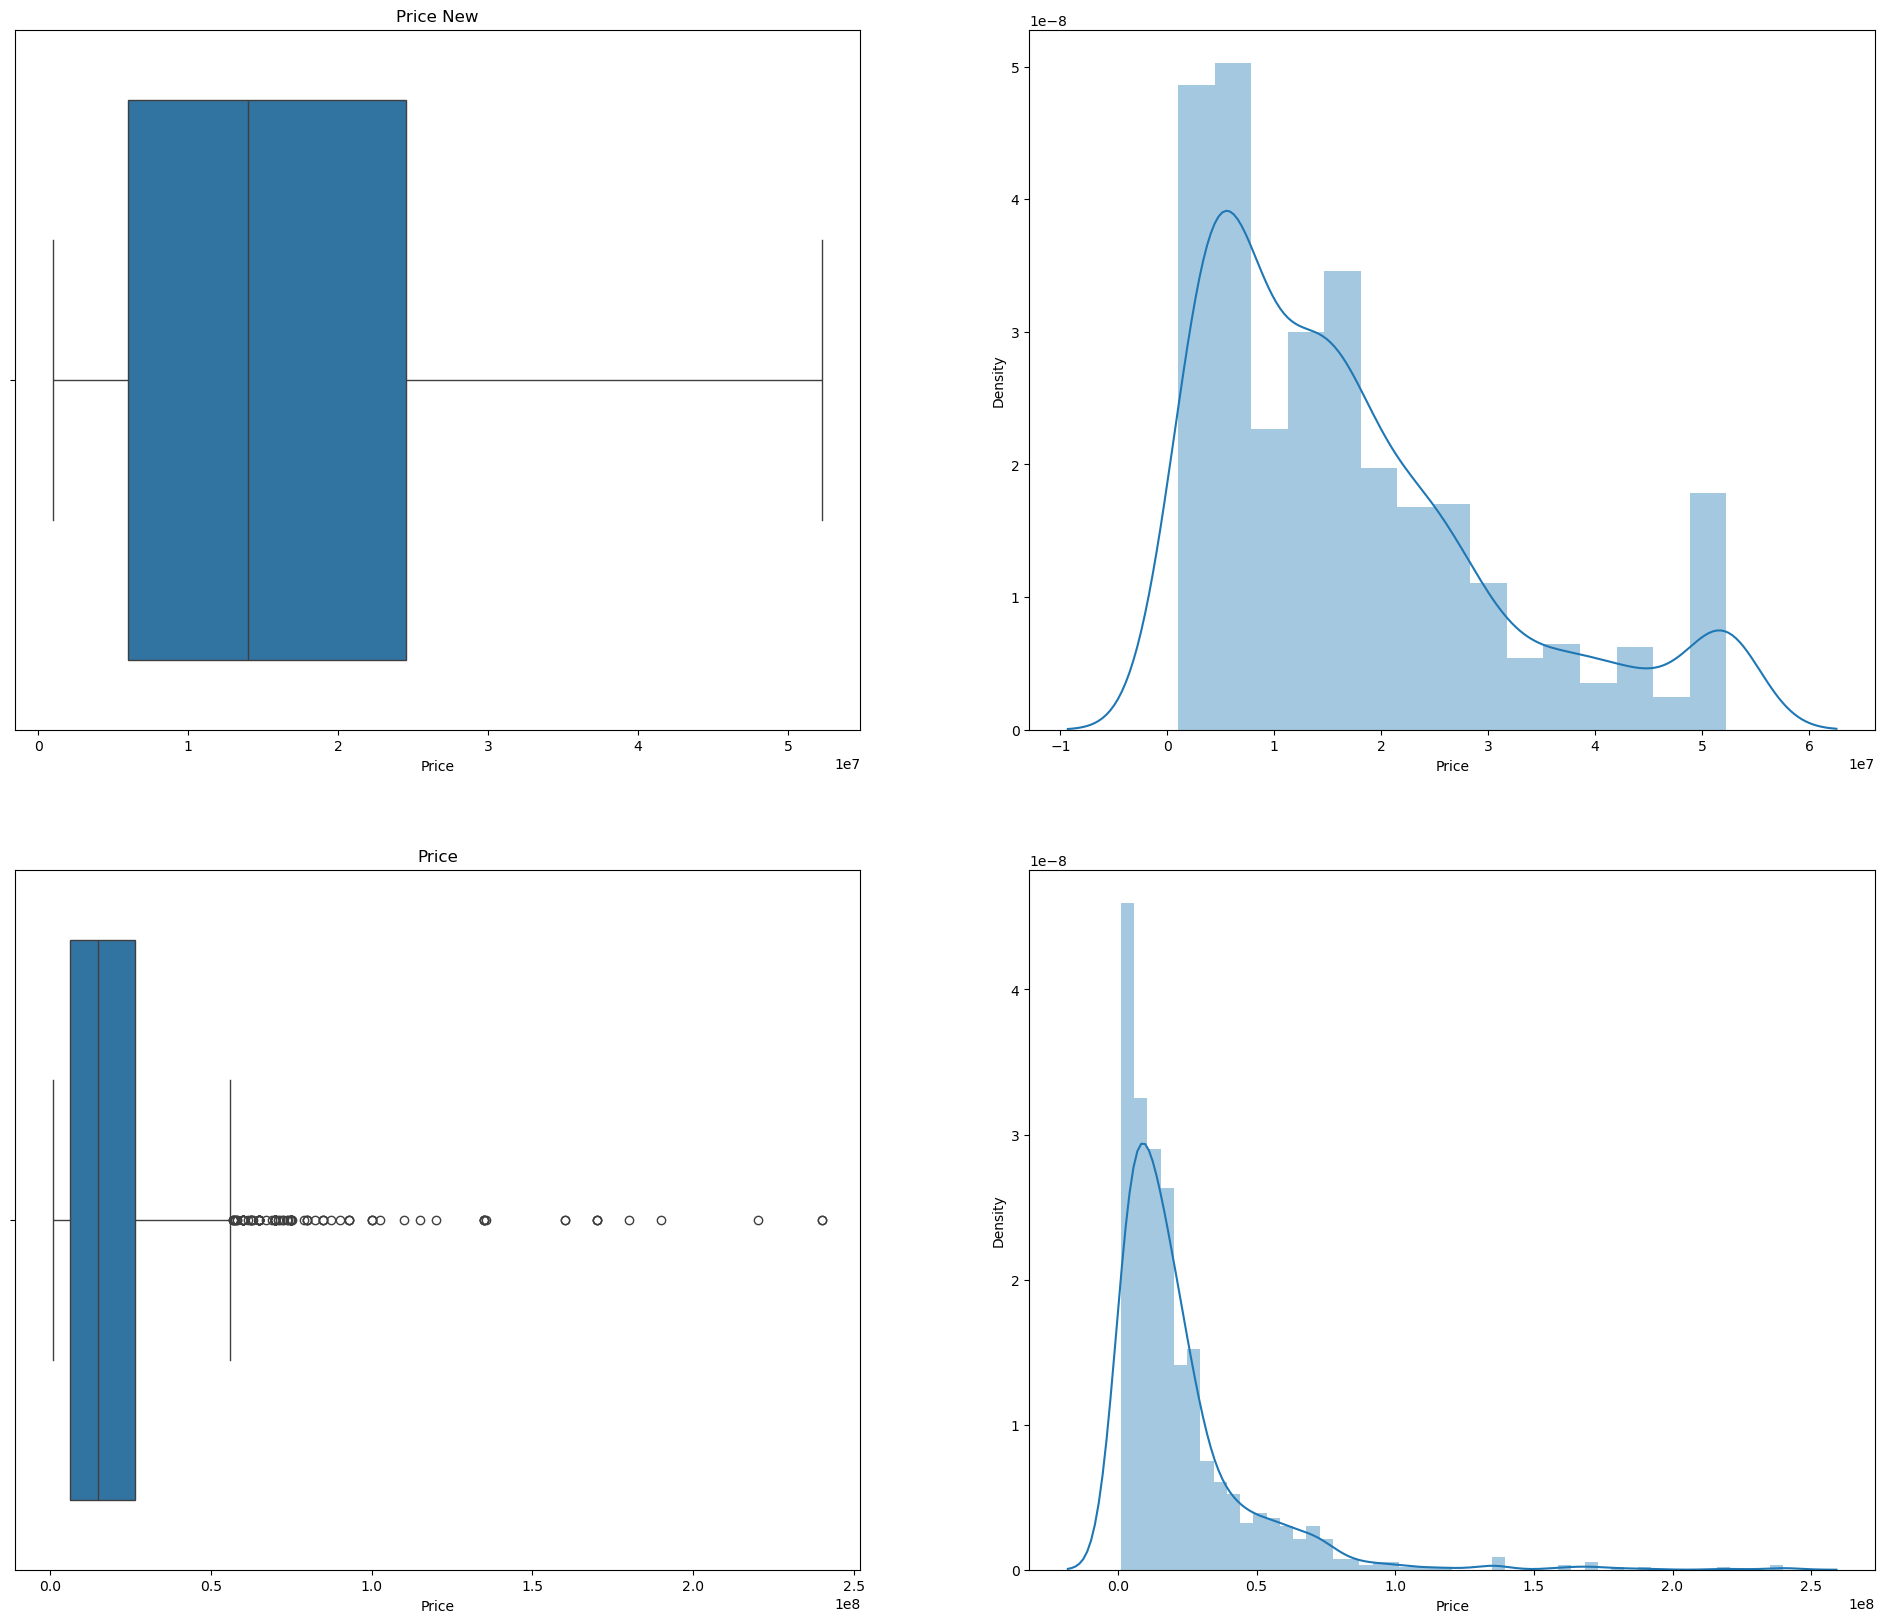

In [48]:
# Comparing 
plt.figure(figsize=(24,20))
plt.subplot(2,2,1)
plt.title('Price New')
sns.boxplot(new_data['Price'],orient='h')

plt.subplot(2,2,2)
sns.distplot(new_data['Price'])

plt.subplot(2,2,3)
plt.title('Price')
sns.boxplot(data['Price'],orient='h')

plt.subplot(2,2,4)
sns.distplot(data['Price'])

### Removing outliers in 'Per_Sqft'

In [49]:
psqft_q1 = new_data['Per_Sqft'].quantile(0.25)
psqft_q3 = new_data['Per_Sqft'].quantile(0.75)
psqft_iqr = psqft_q3 - psqft_q1
psqft_iqr

8104.0

In [50]:
psqft_upper_limit = psqft_q3 + 1.5*psqft_iqr
psqft_lower_limit = psqft_q1 - 1.5*psqft_iqr
print(psqft_lower_limit , psqft_upper_limit)

-5442.0 26974.0


In [51]:
new_data[new_data['Per_Sqft'] > psqft_upper_limit]

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction,Type,Per_Sqft
104,2700.0000,4,4.0,Semi-Furnished,Lajpat Nagar 3,52250000.0,Resale,Builder_Floor,183333.0
105,1400.0000,3,3.0,Unfurnished,Lajpat Nagar 3,24500000.0,Resale,Builder_Floor,183333.0
106,1800.0000,3,3.0,Unfurnished,Lajpat Nagar 3,24500000.0,Resale,Apartment,183333.0
107,1400.0000,3,3.0,Semi-Furnished,Lajpat Nagar 3,32500000.0,New_Property,Builder_Floor,183333.0
232,1800.0000,4,3.0,Semi-Furnished,Other,52250000.0,Resale,Builder_Floor,30556.0
233,1100.0000,2,2.0,Semi-Furnished,Vasant Kunj,15000000.0,Resale,Apartment,30556.0
235,1550.0000,4,3.0,Semi-Furnished,Rohini Sector 24,13000000.0,New_Property,Builder_Floor,30556.0
241,1800.0000,4,4.0,Semi-Furnished,New Friends Colony,52250000.0,New_Property,Builder_Floor,120000.0
244,1700.0000,3,3.0,Semi-Furnished,Other,38500000.0,New_Property,Builder_Floor,120000.0
245,2500.0000,3,3.0,Semi-Furnished,Other,50000000.0,Resale,Apartment,120000.0


In [52]:
# Trimming on 'Per_Sqft'
new_data = new_data[new_data['Per_Sqft'] <= psqft_upper_limit]

C:\Users\Vishal\AppData\Local\Temp\ipykernel_11232\2497970298.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Per_Sqft'])
C:\Users\Vishal\AppData\Local\Temp\ipykernel_11232\2497970298.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Per_Sqft'])


<Axes: xlabel='Per_Sqft', ylabel='Density'>

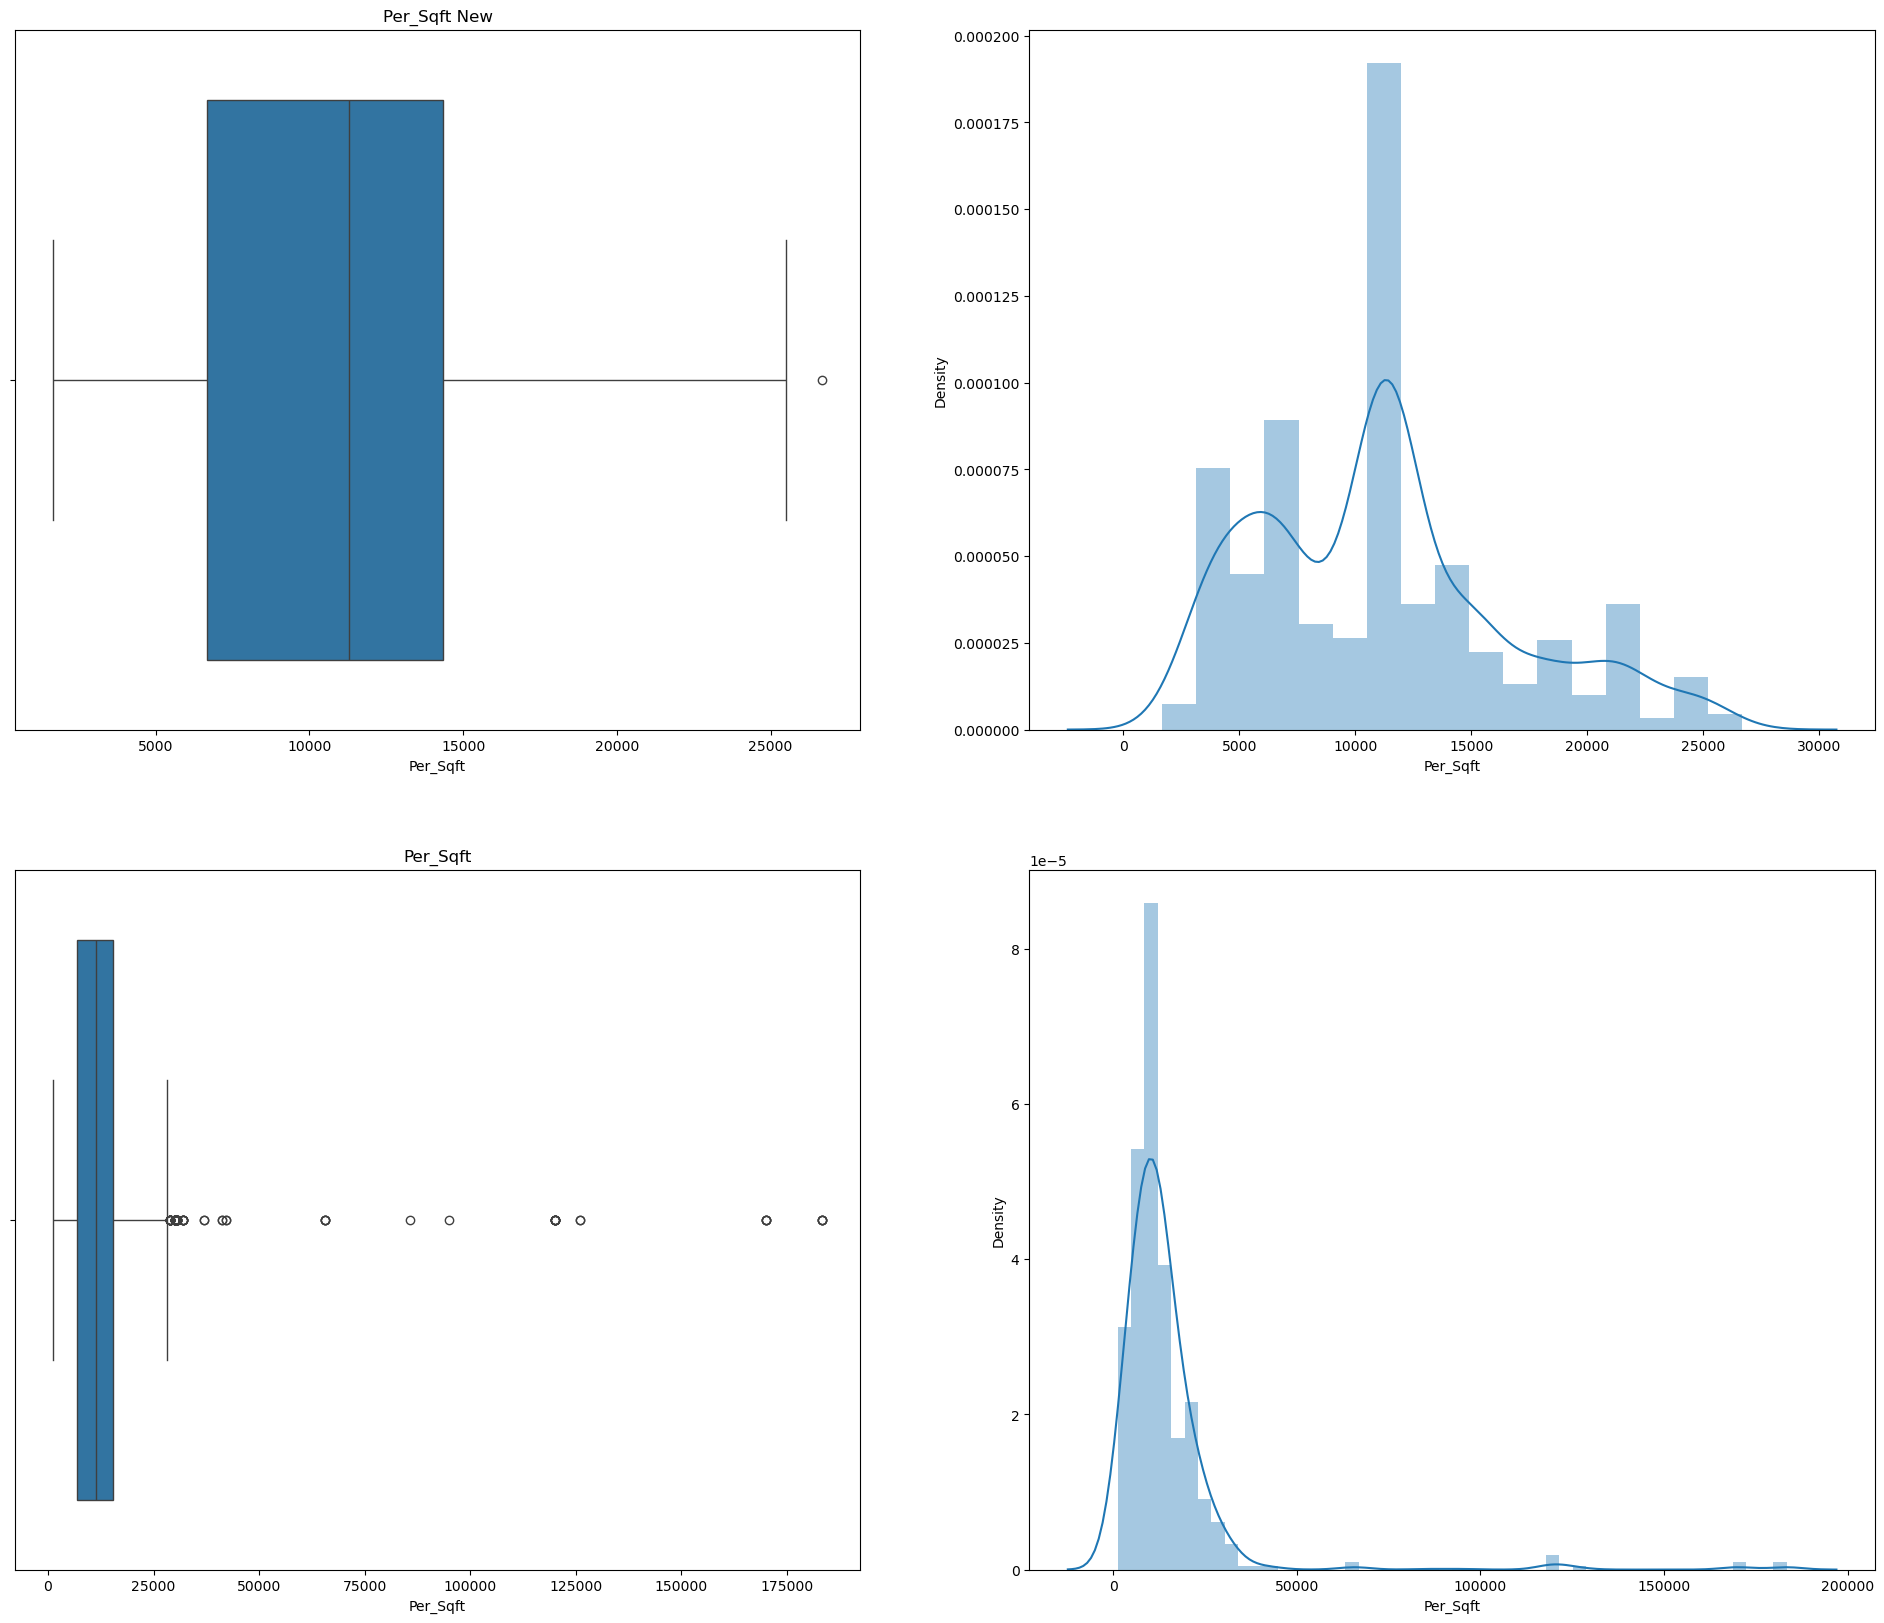

In [53]:
# Comparing 
plt.figure(figsize=(24,20))
plt.subplot(2,2,1)
plt.title('Per_Sqft New')
sns.boxplot(new_data['Per_Sqft'],orient='h')

plt.subplot(2,2,2)
sns.distplot(new_data['Per_Sqft'])

plt.subplot(2,2,3)
plt.title('Per_Sqft')
sns.boxplot(data['Per_Sqft'],orient='h')

plt.subplot(2,2,4)
sns.distplot(data['Per_Sqft'])

## Cleaned Data

In [54]:
new_data

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Other,6500000.0,New_Property,Builder_Floor,11291.5
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",5000000.0,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,Other,15500000.0,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,4200000.0,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24,6200000.0,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...
1252,1800.0,3,3.0,Semi-Furnished,Other,26000000.0,Resale,Builder_Floor,12916.0
1253,1200.0,3,3.0,Semi-Furnished,Chittaranjan Park,16500000.0,Resale,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,12500000.0,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,17500000.0,New_Property,Builder_Floor,12916.0


In [55]:
new_data.to_csv('Cleaned_data.csv')

In [56]:
new_data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Other,6500000.0,New_Property,Builder_Floor,11291.5
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",5000000.0,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,Other,15500000.0,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,4200000.0,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24,6200000.0,New_Property,Builder_Floor,6667.0


In [57]:
new_data.describe()

,Area,BHK,Bathroom,Price,Per_Sqft
count,1030.000000,1030.000000,1030.000000,1.030000e+03,1030.000000
mean,1250.600247,2.674757,2.449515,1.665416e+07,11110.725243
std,551.599090,0.814139,0.882215,1.337934e+07,5425.819187
min,270.000000,1.000000,1.000000,1.000000e+06,1667.000000
25%,850.000000,2.000000,2.000000,6.000000e+06,6667.000000
50%,1200.000000,3.000000,2.000000,1.355000e+07,11291.500000
75%,1600.000000,3.000000,3.000000,2.307500e+07,14358.000000
max,2880.000000,4.000000,5.000000,5.225000e+07,26666.000000


In [58]:
X = new_data.drop(columns=['Price'])
y = new_data['Price']

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso , Ridge
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [61]:
print(X_train.shape)
print(y_train.shape)

(721, 8)
(721,)


## Applying Linear Regression

In [62]:
column_trans = make_column_transformer((OneHotEncoder(sparse_output=False,handle_unknown='ignore'),['Locality','Furnishing','Transaction','Type']) , remainder='passthrough')

In [63]:
scaler = StandardScaler()

In [64]:
lr = LinearRegression()

In [65]:
pipe = make_pipeline(column_trans,scaler,lr)

In [66]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Locality', 'Furnishing',
                                                   'Transaction', 'Type'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [67]:
y_pred_lr = pipe.predict(X_test)

In [68]:
r2_score(y_test,y_pred_lr)

0.8030334828164466

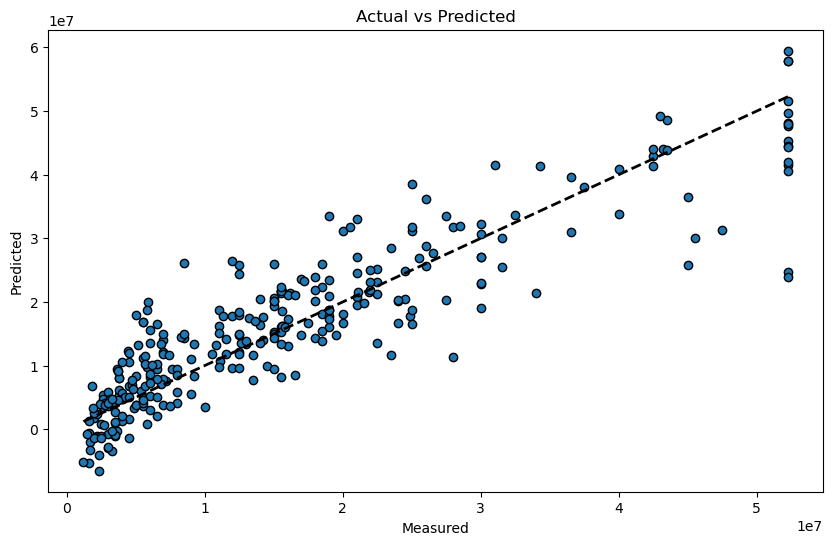

In [69]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

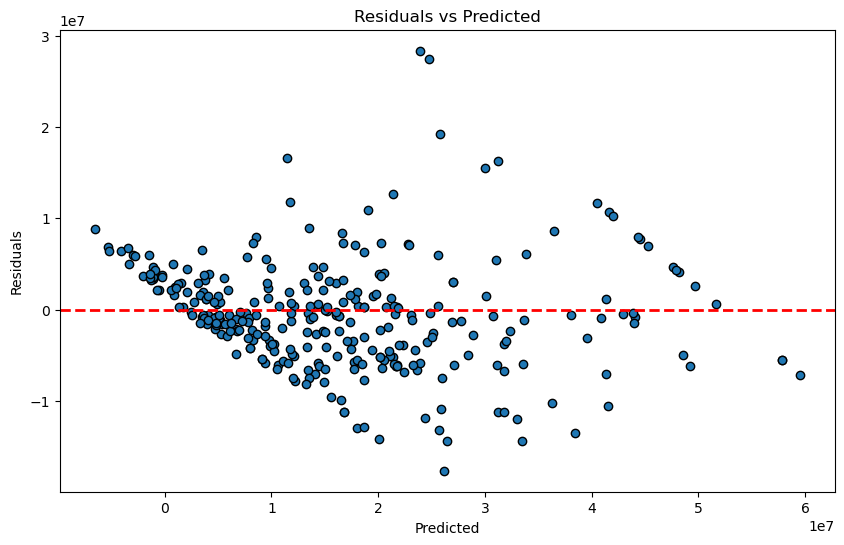

In [70]:
# Plotting residuals
residuals = y_test - y_pred_lr

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, residuals, edgecolors=(0, 0, 0))
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

In [71]:
import pickle

In [72]:
pickle.dump(pipe , open('Model.pkl' , 'wb'))

In [73]:
pipe_test = pickle.load(open('Model.pkl','rb'))

In [74]:
test_data = {
    'BHK': 2,
    'Furnishing': 'Semi-Furnished',
    'Type': 'Apartment',
    'Transaction': 'Resale',
    'Bathroom': 2,
    'Locality': 'Hauz Khas',
    'Area': 900,
    'Per_Sqft': 18000
}

In [75]:
input_df = pd.DataFrame([test_data])

In [76]:
prediction = pipe.predict(input_df)[0]

In [77]:
prediction

22119167.370879192

In [80]:
import sklearn
print(sklearn.__version__)

1.4.2
